<a href="https://colab.research.google.com/github/lisawermers/MAT421/blob/main/MAT421ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module F: 20.1, 20.2, 20.3, 20.4

20.1: Numerical Differentiation Problem Statement

A **numerical grid** is defined as an evenly spaced set of points over the domain of a function. It has a defined **spacing** or **step size** that is the distance between points on the grid. 

Even if a function is continuous sometimes it's valuable to view it in a **discrete** representation where we only see data in specific intervals. 

Here is an example of a numerical grid from -5 to 5:

In [1]:
import numpy as np

A = np.linspace(-5, 5)
print(type(A))
print(A)

<class 'numpy.ndarray'>
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]


20.2: Using Finite Difference to Approximate Derivatives

This is the **limit definition** of a derivative: 
$f'(x)=lim_{x \to a} \frac{f(x)-f(a)}{x-a}$

**Forward difference** estimates the slope of the function at $x_j$ using a line:

$f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$

**Backward difference** estimates the slope of the function at $x_j$ using a line:

$f'(x_j)=\frac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$

**Central difference** estimates the slope of the function at $x_j$ using a line:

$f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

We can use finite differences to approximate derivatives with Taylor Series as well. 

Here's an example of that method being used to find the derivative of sin(x):

0.024998050760130106


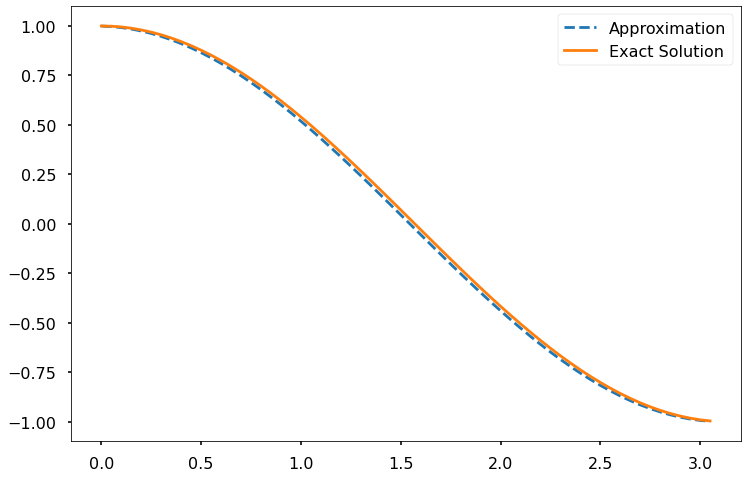

In [27]:
from io import IncrementalNewlineDecoder
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

h = 0.05
x = np.arange(0, np.pi, h)
y=np.sin(x)

foward_dif = np.diff(y)/h
x_diff = x[:-1:]
ex_sol = np.cos(x_diff)

plt.figure(figsize = (12,8))
plt.plot(x_diff, foward_dif, '--', 
         label='Approximation')
plt.plot(x_diff, ex_sol, 
         label = 'Exact Solution')
plt.legend()
plt.show

m_error = max(abs(ex_sol-foward_dif))
print(m_error)

20.3: Approximating of Higher Order Derivatives

We can use the same Taylor Series methods to approximate higher order derivatives (more than 2)

<function matplotlib.pyplot.show(close=None, block=None)>

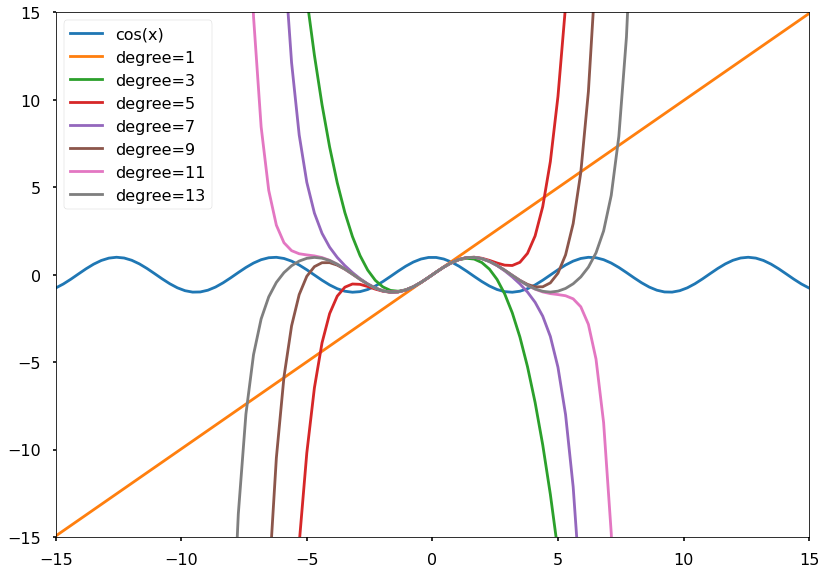

In [20]:
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-15,15, num=100)
plt.figure(figsize = (12,8))
plt.plot(x, np.cos(x), label ="cos(x)")

for degree in np.arange(1,15, step=2):
  taylor_cos = approximate_taylor_polynomial(np.sin, 0, degree, 1, order = degree +2)
  plt.plot(x, taylor_cos(x), label =f"degree={degree }")

plt.legend( )
plt.tight_layout()
plt.axis([-15,15,-15,15])
plt.show
     

20.4: Numerical Differentiation With Noise

**Noise** is something that can "contaminate" data and make the values be off by a small amount. 

A real life example of this is like when you're trying to listen to your friend speak (and their voice is the signal) but the room is crowded and it's difficult to understand them (the background sound is the noise). 

Here's an example of finding the derivative of a function that's been "contaminated" by another smaller function. 

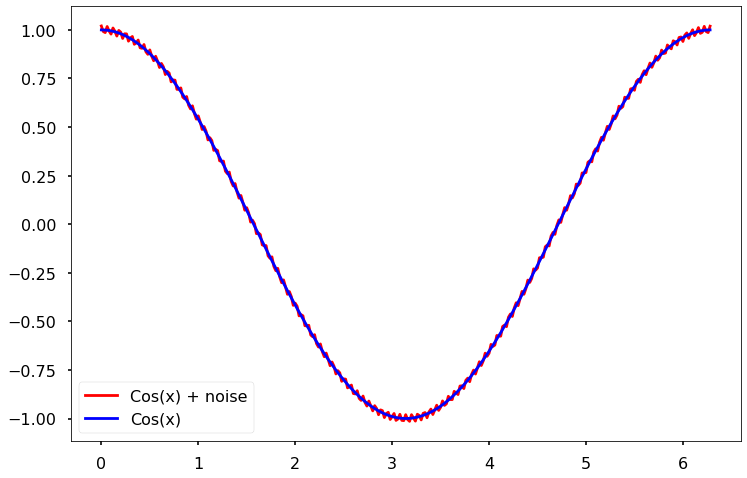

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 

x = np.arange(0, 2*np.pi, 0.02)
omeg = 100
ep = .02

y = np.cos(x)
y_noi = y + ep*np.cos(omeg*x)

plt.figure(figsize = (12,8))
plt.plot(x, y_noi, 'r-', label = "Cos(x) + noise")
plt.plot(x, y  , 'b-' , label = "Cos(x)")
plt.legend()
plt.show()